In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

import warnings            
warnings.filterwarnings("ignore") 


The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

Country : Country

Year : Year 

Status : Developed or Developing status

Life expectancy : Life Expectancy in age

Adult Mortality : Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)

infant deaths : Number of Infant Deaths per 1000 population


Alcohol : Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

percentage:  expenditureExpenditure on health as a percentage of Gross Domestic Product per capita(%)

Hepatitis B : Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

Measles : Measles - number of reported cases per 1000 population

BMI : Average Body Mass Index of entire population

under-five deaths : Number of under-five deaths per 1000 population

Polio : Polio (Pol3) immunization coverage among 1-year-olds (%)

Total expenditure : General government expenditure on health as a percentage of total government expenditure (%)

Diphtheria :  Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

HIV/AIDS : Deaths per 1 000 live births HIV/AIDS (0-4 years)

GDP : Gross Domestic Product per capita (in USD)

Population : Population of the country

thinness 1-19 years : Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

Income composition of resources : Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

Schooling : Number of years of Schooling(years)

In [2]:
LifeExpectancyData = pd.read_csv('data/LifeExpectancyData.csv')
LifeExpectancyData.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
LifeExpectancyData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [5]:
LifeExpectancyData.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [34]:
LifeExpectancyData.columns 

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', ' BMI ', 'under_five deaths ', 'Polio', 'Total_Expenditure',
       'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', ' thinness_1-19 years',
       ' thinness_5-9 years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [99]:
LifeExpectancyData.columns= ['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'thinness_1_19_years', 'thinness_5_9_years',
       'Income_composition_of_resources', 'Schooling']

In [98]:
bos_hucre_toplam = LifeExpectancyData.isnull().sum()
bos_hucre_yuzde = LifeExpectancyData.isnull().sum()/LifeExpectancyData.isnull().count()

bos_degerler = pd.concat([bos_hucre_toplam, bos_hucre_yuzde], axis=1, keys=['bos_toplam', 'bos_yuzde'])

bos_degerler.bos_yuzde.sort_values(ascending= False)[:14]

Population                         0.221920
Hepatitis_B                        0.188223
GDP                                0.152485
Total_Expenditure                  0.076923
Alcohol                            0.066031
Income_composition_of_resources    0.056841
Schooling                          0.055480
BMI                                0.011572
thinness_1-19_years                0.011572
thinness_5-9_years                 0.011572
Diphtheria                         0.006467
Polio                              0.006467
Adult_Mortality                    0.003404
Life_Expectancy                    0.003404
Name: bos_yuzde, dtype: float64

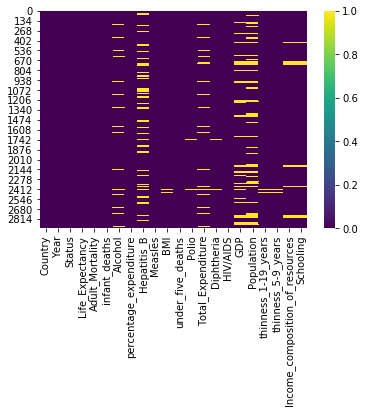

In [81]:
sns.heatmap(LifeExpectancyData.isnull(),cmap='viridis')

In [82]:
fill_list = (bos_degerler.bos_yuzde.sort_values(ascending= False)[:14]).index

In [91]:
fill_list

Index(['Population', 'Hepatitis_B', 'GDP', 'Total_Expenditure', 'Alcohol',
       'Income_composition_of_resources', 'Schooling', 'BMI',
       'thinness_1-19_years', 'thinness_5-9_years', 'Diphtheria', 'Polio',
       'Adult_Mortality', 'Life_Expectancy'],
      dtype='object')

In [92]:
LifeExpectancyData_filled = LifeExpectancyData.copy()

for col in fill_list: 
    LifeExpectancyData_filled[col] = LifeExpectancyData_filled.groupby('Country')[col].transform(lambda x: x.fillna(method = 'bfill'))

In [93]:
LifeExpectancyData_filled.isnull().sum()
##Halen dolmayan degerler var.

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                             17
percentage_expenditure               0
Hepatitis_B                        553
Measles                              0
BMI                                 34
under_five_deaths                    0
Polio                               19
Total_Expenditure                   47
Diphtheria                          19
HIV/AIDS                             0
GDP                                431
Population                         648
thinness_1-19_years                 34
thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [64]:
LifeExpectancyData_filled[LifeExpectancyData_filled.Life_Expectancy.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [65]:
LifeExpectancyData_filled[LifeExpectancyData_filled.Adult_Mortality.isnull()]               

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [66]:
LifeExpectancyData_filled[LifeExpectancyData_filled.Alcohol.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,2.74,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0


In [67]:
LifeExpectancyData_filled[LifeExpectancyData_filled.Hepatitis_B.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
58,Angola,2005,Developing,47.4,382.0,92,5.04,98.191451,NaN,258,...,39.0,4.10,38.0,2.6,1443.991929,19552542.0,1.0,9.9,0.426,6.8
59,Angola,2004,Developing,47.1,386.0,94,3.53,8.866777,NaN,29,...,4.0,4.71,4.0,2.5,141.868440,18865716.0,1.2,1.1,0.415,6.4
60,Angola,2003,Developing,46.8,388.0,95,3.49,35.933491,NaN,1196,...,4.0,4.41,4.0,2.4,779.468356,1823369.0,1.4,1.3,0.406,5.9
61,Angola,2002,Developing,46.5,391.0,96,2.82,24.037942,NaN,11945,...,37.0,3.63,41.0,2.3,711.181716,17572649.0,1.5,1.5,0.401,5.5
62,Angola,2001,Developing,45.7,44.0,97,2.58,30.359936,NaN,9046,...,41.0,5.38,38.0,2.1,526.168743,16983266.0,1.7,1.7,0.391,5.1


In [69]:
LifeExpectancyData_filled[LifeExpectancyData_filled.BMI.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,2.74,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,NaN,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,NaN,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,NaN,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,NaN,1256,...,66.0,NaN,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0


In [70]:
LifeExpectancyData_filled[LifeExpectancyData_filled.Polio.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
1742,Montenegro,2005,Developing,73.6,133.0,0,0.01,527.307672,NaN,0,...,NaN,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,NaN,0,...,NaN,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,NaN,0,...,NaN,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,NaN,0,...,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,NaN,0,...,NaN,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,NaN,0,...,NaN,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0


In [71]:
LifeExpectancyData_filled[LifeExpectancyData_filled.Total_Expenditure.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
705,Democratic People's Republic of Korea,2015,Developing,76.0,139.0,6,0.01,0.0,96.0,0,...,99.0,NaN,96.0,0.1,NaN,NaN,4.9,4.9,NaN,NaN
706,Democratic People's Republic of Korea,2014,Developing,73.0,142.0,6,0.01,0.0,93.0,3,...,99.0,NaN,93.0,0.1,NaN,NaN,4.9,4.9,NaN,NaN
707,Democratic People's Republic of Korea,2013,Developing,71.0,146.0,6,3.35,0.0,93.0,0,...,99.0,NaN,93.0,0.1,NaN,NaN,5.0,5.0,NaN,NaN
708,Democratic People's Republic of Korea,2012,Developing,69.8,149.0,7,3.61,0.0,96.0,0,...,99.0,NaN,96.0,0.1,NaN,NaN,5.1,5.1,NaN,NaN
709,Democratic People's Republic of Korea,2011,Developing,69.4,153.0,8,3.39,0.0,94.0,0,...,99.0,NaN,94.0,0.1,NaN,NaN,5.1,5.2,NaN,NaN
710,Democratic People's Republic of Korea,2010,Developing,69.0,157.0,8,3.12,0.0,93.0,0,...,99.0,NaN,93.0,0.1,NaN,NaN,5.2,5.2,NaN,NaN
711,Democratic People's Republic of Korea,2009,Developing,68.7,161.0,9,3.35,0.0,93.0,0,...,98.0,NaN,93.0,0.1,NaN,NaN,5.3,5.3,NaN,NaN
712,Democratic People's Republic of Korea,2008,Developing,68.6,164.0,9,3.16,0.0,92.0,8,...,98.0,NaN,92.0,0.1,NaN,NaN,5.4,5.4,NaN,NaN
713,Democratic People's Republic of Korea,2007,Developing,68.5,166.0,9,3.13,0.0,92.0,3550,...,99.0,NaN,92.0,0.1,NaN,NaN,5.5,5.5,NaN,NaN
714,Democratic People's Republic of Korea,2006,Developing,68.5,165.0,10,3.28,0.0,96.0,0,...,98.0,NaN,89.0,0.1,NaN,NaN,5.6,5.6,NaN,NaN


In [73]:
LifeExpectancyData_filled[LifeExpectancyData_filled.Diphtheria.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
1742,Montenegro,2005,Developing,73.6,133.0,0,0.01,527.307672,NaN,0,...,NaN,8.46,NaN,0.1,3674.617924,614261.0,2.3,2.3,0.746,12.8
1743,Montenegro,2004,Developing,73.5,134.0,0,0.01,57.121901,NaN,0,...,NaN,8.45,NaN,0.1,338.199535,613353.0,2.3,2.4,0.740,12.6
1744,Montenegro,2003,Developing,73.5,134.0,0,0.01,495.078296,NaN,0,...,NaN,8.91,NaN,0.1,2789.173500,612267.0,2.4,2.4,0.000,0.0
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,NaN,0,...,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1746,Montenegro,2001,Developing,73.3,136.0,0,0.01,33.669814,NaN,0,...,NaN,8.23,NaN,0.1,199.583957,67389.0,2.5,2.6,0.000,0.0
1747,Montenegro,2000,Developing,73.0,144.0,0,0.01,274.547260,NaN,0,...,NaN,7.32,NaN,0.1,1627.428930,6495.0,2.6,2.7,0.000,0.0
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,NaN,0,...,NaN,NaN,NaN,4.2,NaN,88568.0,NaN,NaN,0.000,0.0


In [74]:
 LifeExpectancyData_filled[ LifeExpectancyData_filled.GDP.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
160,Bahamas,2015,Developing,76.1,147.0,0,9.45,0.0,95.0,0,...,95.0,7.74,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
161,Bahamas,2014,Developing,75.4,16.0,0,9.45,0.0,96.0,0,...,96.0,7.74,96.0,0.1,NaN,NaN,2.5,2.5,0.789,12.6
162,Bahamas,2013,Developing,74.8,172.0,0,9.42,0.0,97.0,0,...,97.0,7.50,97.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
163,Bahamas,2012,Developing,74.9,167.0,0,9.50,0.0,96.0,0,...,99.0,7.43,98.0,0.2,NaN,NaN,2.5,2.5,0.789,12.6
164,Bahamas,2011,Developing,75.0,162.0,0,9.34,0.0,95.0,0,...,97.0,7.63,98.0,0.1,NaN,NaN,2.5,2.5,0.788,12.6
165,Bahamas,2010,Developing,75.0,161.0,0,9.19,0.0,98.0,0,...,97.0,7.44,99.0,0.2,NaN,NaN,2.5,2.5,0.788,12.6
166,Bahamas,2009,Developing,74.6,168.0,0,9.29,0.0,95.0,0,...,97.0,7.43,96.0,0.1,NaN,NaN,2.5,2.5,0.791,12.6
167,Bahamas,2008,Developing,74.5,167.0,0,10.15,0.0,9.0,0,...,93.0,7.30,93.0,0.1,NaN,NaN,2.5,2.5,0.791,12.6
168,Bahamas,2007,Developing,74.4,167.0,0,10.75,0.0,93.0,0,...,95.0,7.80,95.0,0.1,NaN,NaN,2.5,2.5,0.790,12.5
169,Bahamas,2006,Developing,74.2,171.0,0,11.07,0.0,96.0,0,...,94.0,6.93,95.0,0.1,NaN,NaN,2.5,2.5,0.788,12.4


In [75]:
LifeExpectancyData_filled[ LifeExpectancyData_filled.Population.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,8.56,0.000000,99.0,0,...,86.0,5.54,99.0,0.2,13566.954100,NaN,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.296670,NaN,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.864160,NaN,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,...,97.0,5.39,98.0,0.2,12565.441970,NaN,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.84,1810.875316,99.0,0,...,99.0,5.65,99.0,0.1,11929.349910,NaN,3.3,3.3,0.782,14.1
69,Antigua and Barbuda,2010,Developing,75.6,138.0,0,7.84,1983.956937,98.0,0,...,99.0,5.63,98.0,0.1,12126.876140,NaN,3.3,3.3,0.783,14.1
70,Antigua and Barbuda,2009,Developing,75.4,14.0,0,7.82,149.358735,98.0,0,...,98.0,4.86,99.0,0.1,1312.466920,NaN,3.4,3.3,0.788,14.2
71,Antigua and Barbuda,2008,Developing,75.2,142.0,0,8.27,180.776270,98.0,0,...,99.0,4.69,99.0,0.1,1473.319230,NaN,3.4,3.3,0.786,14.4
72,Antigua and Barbuda,2007,Developing,75.0,144.0,0,8.64,257.966531,97.0,0,...,98.0,4.27,99.0,0.1,14252.294520,NaN,3.4,3.3,0.781,14.5
73,Antigua and Barbuda,2006,Developing,74.8,145.0,0,8.93,216.314694,99.0,0,...,99.0,4.34,99.0,0.1,12724.393770,NaN,3.4,3.4,0.773,14.7


In [102]:
LifeExpectancyData_filled.columns

Index(['Country', 'Year', 'Status', 'Life_Expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under_five_deaths', 'Polio', 'Total_Expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [100]:
LifeExpectancyData_filled[LifeExpectancyData_filled.thinness_1_19_years.isnull()]

AttributeError: 'DataFrame' object has no attribute 'thinness_1_19_years'

In [101]:
LifeExpectancyData_filled[LifeExpectancyData_filled.thinness_5_9_years.isnull()]

AttributeError: 'DataFrame' object has no attribute 'thinness_5_9_years'

In [77]:
LifeExpectancyData_filled[ LifeExpectancyData_filled.Income_composition_of_resources.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,0.01,0.0,83.0,65,...,81.0,5.72,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,...,76.0,5.72,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,...,79.0,5.81,8.0,2.4,NaN,NaN,5.8,5.7,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,...,83.0,6.14,82.0,2.9,NaN,NaN,5.9,5.9,NaN,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,...,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN
437,Côte d'Ivoire,2010,Developing,51.5,417.0,60,3.15,0.0,85.0,441,...,81.0,6.32,85.0,3.3,NaN,NaN,6.3,6.2,NaN,NaN
438,Côte d'Ivoire,2009,Developing,51.0,426.0,60,2.92,0.0,81.0,183,...,77.0,6.41,81.0,3.7,NaN,NaN,6.5,6.4,NaN,NaN
439,Côte d'Ivoire,2008,Developing,54.0,437.0,60,2.69,0.0,74.0,12,...,58.0,6.21,74.0,4.1,NaN,NaN,6.6,6.6,NaN,NaN
440,Côte d'Ivoire,2007,Developing,49.9,443.0,61,2.58,0.0,76.0,5,...,75.0,6.35,76.0,5.3,NaN,NaN,6.8,6.7,NaN,NaN
441,Côte d'Ivoire,2006,Developing,49.4,452.0,62,2.65,0.0,77.0,11,...,76.0,5.87,77.0,5.8,NaN,NaN,7.0,6.9,NaN,NaN


In [78]:
LifeExpectancyData_filled[ LifeExpectancyData_filled.Schooling.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,0.01,0.0,83.0,65,...,81.0,5.72,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,...,76.0,5.72,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,...,79.0,5.81,8.0,2.4,NaN,NaN,5.8,5.7,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,...,83.0,6.14,82.0,2.9,NaN,NaN,5.9,5.9,NaN,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,...,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN
437,Côte d'Ivoire,2010,Developing,51.5,417.0,60,3.15,0.0,85.0,441,...,81.0,6.32,85.0,3.3,NaN,NaN,6.3,6.2,NaN,NaN
438,Côte d'Ivoire,2009,Developing,51.0,426.0,60,2.92,0.0,81.0,183,...,77.0,6.41,81.0,3.7,NaN,NaN,6.5,6.4,NaN,NaN
439,Côte d'Ivoire,2008,Developing,54.0,437.0,60,2.69,0.0,74.0,12,...,58.0,6.21,74.0,4.1,NaN,NaN,6.6,6.6,NaN,NaN
440,Côte d'Ivoire,2007,Developing,49.9,443.0,61,2.58,0.0,76.0,5,...,75.0,6.35,76.0,5.3,NaN,NaN,6.8,6.7,NaN,NaN
441,Côte d'Ivoire,2006,Developing,49.4,452.0,62,2.65,0.0,77.0,11,...,76.0,5.87,77.0,5.8,NaN,NaN,7.0,6.9,NaN,NaN


In [40]:
LifeExpectancyData[LifeExpectancyData.Alcohol.isnull()][LifeExpectancyData.Country == 'Algeria']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.0,95.0,63,...,95.0,NaN,95.0,0.1,4132.76292,39871528.0,6.0,5.8,0.743,14.4


In [42]:
LifeExpectancyData[LifeExpectancyData.Country == 'Algeria']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,NaN,0.000000,95.0,63,...,95.0,NaN,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
33,Algeria,2014,Developing,75.4,11.0,21,0.01,54.237318,95.0,0,...,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012,Developing,75.1,113.0,21,0.66,555.926083,95.0,18,...,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
36,Algeria,2011,Developing,74.9,116.0,21,0.56,509.002041,95.0,112,...,95.0,5.29,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0
37,Algeria,2010,Developing,74.7,119.0,21,0.45,430.717586,95.0,103,...,95.0,5.12,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
38,Algeria,2009,Developing,74.4,123.0,20,0.50,352.063642,94.0,107,...,94.0,5.36,95.0,0.1,3868.831230,3546576.0,6.0,5.9,0.705,13.1
39,Algeria,2008,Developing,74.1,126.0,20,0.46,43.087173,91.0,217,...,92.0,4.20,93.0,0.1,495.254866,3486715.0,6.0,5.9,0.697,12.6
40,Algeria,2007,Developing,73.8,129.0,20,0.44,320.323924,9.0,0,...,95.0,3.82,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
41,Algeria,2006,Developing,73.4,132.0,20,0.36,270.240196,8.0,944,...,95.0,3.36,95.0,0.1,3464.617900,33777915.0,6.1,6.0,0.686,12.3


In [43]:
LifeExpectancyData.fillna(0)[LifeExpectancyData.Country == 'Algeria']

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
32,Algeria,2015,Developing,75.6,19.0,21,0.00,0.000000,95.0,63,...,95.0,0.00,95.0,0.1,4132.762920,39871528.0,6.0,5.8,0.743,14.4
33,Algeria,2014,Developing,75.4,11.0,21,0.01,54.237318,95.0,0,...,95.0,7.21,95.0,0.1,547.851700,39113313.0,6.0,5.8,0.741,14.4
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012,Developing,75.1,113.0,21,0.66,555.926083,95.0,18,...,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4
36,Algeria,2011,Developing,74.9,116.0,21,0.56,509.002041,95.0,112,...,95.0,5.29,95.0,0.1,5432.252300,36819558.0,5.9,5.8,0.724,14.0
37,Algeria,2010,Developing,74.7,119.0,21,0.45,430.717586,95.0,103,...,95.0,5.12,95.0,0.1,4463.394675,36117637.0,5.9,5.8,0.714,13.6
38,Algeria,2009,Developing,74.4,123.0,20,0.50,352.063642,94.0,107,...,94.0,5.36,95.0,0.1,3868.831230,3546576.0,6.0,5.9,0.705,13.1
39,Algeria,2008,Developing,74.1,126.0,20,0.46,43.087173,91.0,217,...,92.0,4.20,93.0,0.1,495.254866,3486715.0,6.0,5.9,0.697,12.6
40,Algeria,2007,Developing,73.8,129.0,20,0.44,320.323924,9.0,0,...,95.0,3.82,95.0,0.1,3935.183343,34376.0,6.0,5.9,0.690,12.3
41,Algeria,2006,Developing,73.4,132.0,20,0.36,270.240196,8.0,944,...,95.0,3.36,95.0,0.1,3464.617900,33777915.0,6.1,6.0,0.686,12.3


In [95]:
LifeExpectancyData[LifeExpectancyData['Country'] == 'Sudan'].mean()

Year                               2.007500e+03
Life_Expectancy                    6.182500e+01
Adult_Mortality                    2.403125e+02
infant_deaths                      6.462500e+01
Alcohol                            1.367500e+00
percentage_expenditure             9.769844e+01
Hepatitis B                        7.236364e+01
Measles                            3.108000e+03
 BMI                                        NaN
under_five deaths                  9.662500e+01
Polio                              7.225000e+01
Total_Expenditure                  5.866250e+00
Diphtheria                         7.237500e+01
 HIV/AIDS                          2.500000e-01
GDP                                1.192798e+03
Population                         1.804652e+07
 thinness_1-19 years                        NaN
 thinness_5-9 years                         NaN
Income_composition_of_resources    4.410000e-01
Schooling                          6.375000e+00
dtype: float64

In [77]:
LifeExpectancyData.Alcohol[LifeExpectancyData[Country == 'Sudan']

SyntaxError: unexpected EOF while parsing (<ipython-input-77-03530d625048>, line 1)

bolgeye gore interpolate ile doldurma 

In [44]:
df1 = LifeExpectancyData.fillna(method='pad').head()

In [47]:
df1.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [68]:
LifeExpectancyData_filled = LifeExpectancyData.copy()

for col in fill_list: 
    LifeExpectancyData_filled[col] = LifeExpectancyData_filled.groupby('Country')[col].transform(lambda x: x.fillna(method = 'bfill'))

In [74]:
LifeExpectancyData_filled.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                             17
percentage_expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                34
under_five deaths                    0
Polio                                0
Total_Expenditure                   32
Diphtheria                           0
 HIV/AIDS                            0
GDP                                405
Population                         648
 thinness_1-19 years                34
 thinness_5-9 years                 34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [ ]:
# Sudan kontrol et ve bak 

In [ ]:
LifeExpectancyData_filled[LifeExpectancyData_filled.Alcohol.isnull()]

In [76]:
LifeExpectancyData_filled[LifeExpectancyData_filled.Alcohol.isnull()]

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2409,South Sudan,2015,Developing,57.3,332.0,26,NaN,0.000000,31.0,878,...,41.0,2.74,31.0,3.4,758.725782,11882136.0,NaN,NaN,0.421,4.9
2410,South Sudan,2014,Developing,56.6,343.0,26,NaN,46.074469,31.0,441,...,44.0,2.74,39.0,3.5,1151.861715,1153971.0,NaN,NaN,0.421,4.9
2411,South Sudan,2013,Developing,56.4,345.0,26,NaN,47.444530,31.0,525,...,5.0,2.62,45.0,3.6,1186.113250,1117749.0,NaN,NaN,0.417,4.9
2412,South Sudan,2012,Developing,56.0,347.0,26,NaN,38.338232,31.0,1952,...,64.0,2.77,59.0,3.8,958.455810,1818258.0,NaN,NaN,0.419,4.9
2413,South Sudan,2011,Developing,55.4,355.0,27,NaN,0.000000,31.0,1256,...,66.0,2.77,61.0,3.9,176.971300,1448857.0,NaN,NaN,0.429,4.9
2414,South Sudan,2010,Developing,55.0,359.0,27,NaN,0.000000,31.0,0,...,66.0,2.77,61.0,4.0,1562.239346,167192.0,NaN,NaN,0.000,0.0
2415,South Sudan,2009,Developing,54.3,369.0,27,NaN,0.000000,31.0,0,...,66.0,2.77,61.0,4.2,1264.789980,967667.0,NaN,NaN,0.000,0.0
2416,South Sudan,2008,Developing,53.6,377.0,27,NaN,0.000000,31.0,0,...,66.0,2.77,61.0,4.2,1678.711862,9263136.0,NaN,NaN,0.000,0.0
2417,South Sudan,2007,Developing,53.1,381.0,27,NaN,0.000000,31.0,0,...,66.0,2.77,61.0,4.2,1678.711862,88568.0,NaN,NaN,0.000,0.0


In [72]:
LifeExpectancyData_filled.Alcohol[LifeExpectancyData_filled.Country == 'Algeria']

32    0.01
33    0.01
34    0.53
35    0.66
36    0.56
37    0.45
38    0.50
39    0.46
40    0.44
41    0.36
42    0.50
43    0.45
44    0.34
45    0.36
46    0.23
47    0.25
Name: Alcohol, dtype: float64

In [73]:
LifeExpectancyData_filled = LifeExpectancyData.copy()

for col in fill_list: 
    LifeExpectancyData_filled[col] = LifeExpectancyData_filled.groupby('Country')[col].transform(lambda x: x.interpolate(limit_direction='both')) 

In [17]:
LifeExpectancyData.fillna(method='ffill')

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [18]:
LifeExpectancyData.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                            194
percentage_expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under_five deaths                    0
Polio                               19
Total_Expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness_1-19 years                34
 thinness_5-9 years                 34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [19]:
#SOR

LifeExpectancyData.interpolate(method='values').head()

,Country,Year,Status,Life_Expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis B,Measles,...,Polio,Total_Expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness_1-19 years,thinness_5-9 years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [20]:
## SOR 

LifeExpectancyData.prod()

Year                                    inf
Life_Expectancy                         inf
Adult_Mortality                         inf
infant_deaths                      0.000000
Alcohol                                 inf
percentage_expenditure             0.000000
Hepatitis B                             inf
Measles                            0.000000
 BMI                                    inf
under_five deaths                  0.000000
Polio                                   inf
Total_Expenditure                       inf
Diphtheria                              inf
 HIV/AIDS                          0.000000
GDP                                     inf
Population                              inf
 thinness_1-19 years                    inf
 thinness_5-9 years                     inf
Income_composition_of_resources    0.000000
Schooling                          0.000000
dtype: float64

In [21]:
LifeExpectancyData_filled = LifeExpectancyData.copy() 

In [22]:
for col in fill_list: 
    LifeExpectancyData_filled.groupby('Country')[col].transform(lambda x: x.interpolate(limit_direction='both')) 

In [23]:
fillna(method = 'ffill')

NameError: name 'fillna' is not defined

In [ ]:
for col in fill_list: 
    LifeExpectancyData_filled[col]=LifeExpectancyData_filled.groupby('Country')[col].transform(lambda x: x.fillna(method = 'ffill'))  

In [24]:
for col in fill_list: 
    LifeExpectancyData_filled[col]=LifeExpectancyData_filled.groupby('Country')[col].transform(lambda x: x.fillna(method = 'bfill'))


In [25]:
for col in fill_list: 
    LifeExpectancyData_filled[col].fillna(LifeExpectancyData_filled.groupby(by = 'Country').mean()[col], inplace= True)

In [26]:
LifeExpectancyData_filled.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_Expectancy                     10
Adult_Mortality                     10
infant_deaths                        0
Alcohol                             17
percentage_expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under_five deaths                    0
Polio                               19
Total_Expenditure                   47
Diphtheria                          19
 HIV/AIDS                            0
GDP                                431
Population                         648
 thinness_1-19 years                34
 thinness_5-9 years                 34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

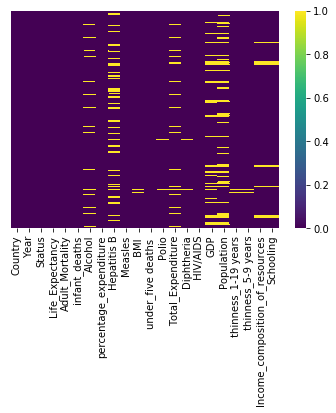

In [27]:
sns.heatmap(LifeExpectancyData.isnull(), yticklabels= False, cmap='viridis', cbar=True)

A quick look at correlations between variables

In [28]:
LifeExpectancyData_num_na= LifeExpectancyData._get_numeric_data() 

In [29]:
LifeExpectancyData.shape

(2938, 22)

In [30]:
LifeExpectancyData_num_na.shape

(2938, 20)

In [31]:
LifeExpectancyData_num_na.columns

Index(['Year', 'Life_Expectancy', 'Adult_Mortality', 'infant_deaths',
       'Alcohol', 'percentage_expenditure', 'Hepatitis B', 'Measles', ' BMI ',
       'under_five deaths ', 'Polio', 'Total_Expenditure', 'Diphtheria',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness_1-19 years',
       ' thinness_5-9 years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [32]:
corr_list = LifeExpectancyData_num_na.corr().Life_Expectancy.abs().sort_values(ascending = False).index[1:] 

In [33]:
corr_matrix = LifeExpectancyData_num_na.corr()

corr_matrix.Life_Expectancy.abs().sort_values(ascending = False)[1:] 

Schooling                          0.751975
Income_composition_of_resources    0.724776
Adult_Mortality                    0.696359
 BMI                               0.567694
 HIV/AIDS                          0.556556
Diphtheria                         0.479495
 thinness_1-19 years               0.477183
 thinness_5-9 years                0.471584
Polio                              0.465556
GDP                                0.461455
Alcohol                            0.404877
percentage_expenditure             0.381864
Hepatitis B                        0.256762
under_five deaths                  0.222529
Total_Expenditure                  0.218086
infant_deaths                      0.196557
Year                               0.170033
Measles                            0.157586
Population                         0.021538
Name: Life_Expectancy, dtype: float64

Text(0.5, 1.0, 'Korelasyon Matrisi (LifeExpentacy)')

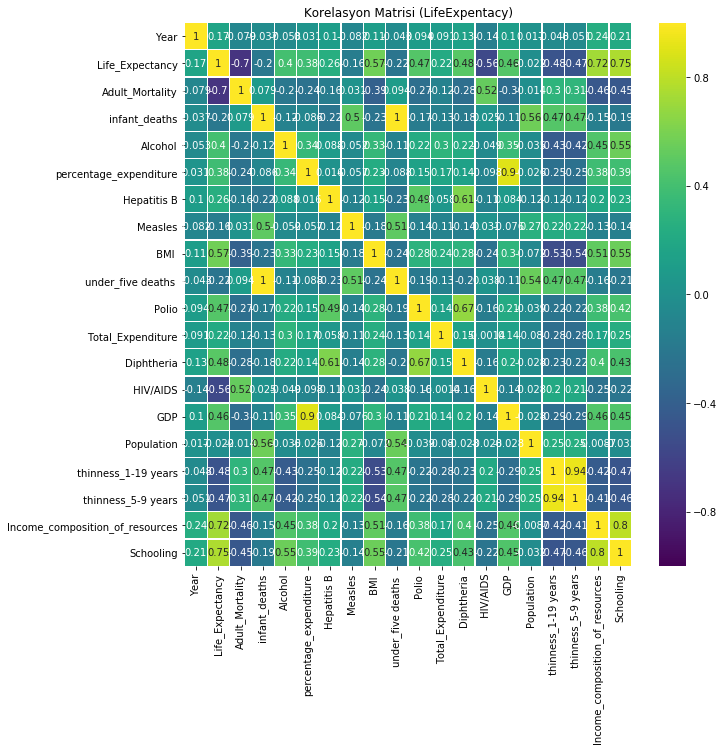

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, linewidths=.2, vmin=-1, vmax=1, cmap='viridis')
plt.title("Korelasyon Matrisi (LifeExpentacy)")